## Gán giá trị bất kỳ

Gán là hành động thay thế dữ liệu bị khuyết bằng các ước tính thống kê về các giá trị bị khuyết. Mục tiêu của bất kỳ kỹ thuật gán nào là tạo ra một **tập dữ liệu hoàn chỉnh** có thể sử dụng để huấn luyện các mô hình học máy.

Gán giá trị bất kỳ gồm việc thay thế tất cả các lần xuất hiện của giá trị bị khuyết (NA) trong một biến bằng một giá trị bất kỳ. Các giá trị bất kỳ thường được sử dụng là 0, 999, -999 (hoặc các tổ hợp khác của 9s) hoặc -1 (nếu phân phối dương).


### Những biến nào có thể gán giá trị bất kỳ?

Cả biến hạng mục và biến dạng số đều có thể gán bằng các giá trị bất kỳ.

Với các biến hạng mục, điều này tương đương với việc thay thế tất cả các trường hợp của NA bằng một nhãn bổ sung, điều này rất phổ biến nên chúng ta sẽ xử lý nó riêng trong notebook khác.

### Giả định

- Dữ liệu không bị khuyết ngẫu nhiên.

Nếu trường hợp này xảy ra, chúng ta cần gắn cờ các giá trị bị khuyết bằng một giá trị khác (bất kỳ) thay vì thay thế những lần xuất hiện đó bằng mean hoặc median đại diện cho giá trị phổ biến nhất.


### Ưu điểm

- Dễ thực hiện.
- Cách nhanh chóng để có được tập dữ liệu hoàn chỉnh.
- Có thể tích hợp trong sản xuất (trong quá trình triển khai mô hình).
- Nắm bắt được tầm quan trọng của "khuyết" nếu có.


### Hạn chế

- Làm biến dạng phân phối biến ban đầu.
- Làm biến dạng phương sai ban đầu.
- Làm biến dạng hiệp phương sai với các biến còn lại của tập dữ liệu.
- Nếu giá trị bất kỳ ở cuối phân phối, nó có thể che dấu hoặc tạo ra các outlier.
- Cần cẩn thận để không chọn phải một giá trị bất kỳ quá giống với mean hoặc median (hoặc bất kỳ giá trị phổ biến nào khác của phân phối biến).


### Khi nào thì sử dụng giá trị bất kỳ

Thay thế NA bằng các giá trị bất kỳ nên được sử dụng khi có lý do chứng minh NA không bị khuyết ngẫu nhiên. Trong những tình huống như vậy, chúng ta không thay thế bằng mean/median nên làm cho NA giống như phần lớn các quan sát. Thay vào đó, chúng ta muốn gắn cờ quan sát bị khuyết.

Phương pháp này được sử dụng rộng rãi ở các tổ chức và các cuộc thi Kaggle. Nó gồm việc thay thế NA bằng một giá trị bất kỳ, có thể sáng tạo nhưng phải khác với median/mean/mode và không nằm trong các giá trị thường của biến.

Bài toán gồm việc quyết định lựa chọn giá trị bất kỳ.

### Lưu ý cuối cùng

Khi các biến được thu nạp bởi các bên thứ ba như cơ quan tín dụng, họ sẽ đặt các số bất kỳ để báo hiệu rằng giá trị cho quan sát đó bị khuyết. Vì vậy, gán giá trị bất kỳ cũng phổ biến trong việc thu thập dữ liệu thực tế.

## Trong bản mô phỏng này:

Chúng ta sẽ học cách thực hiện gán giá trị bất kỳ sử dụng pandas trên tập dữ liệu Ames House Price và Titanic.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# chia các tập dữ liệu
from sklearn.model_selection import train_test_split

In [3]:
# load tập dữ liệu với một số biến để trình bày

data = pd.read_csv('./datatset/titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [4]:
# xem phần trăm của NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

Biến duy nhất có dữ liệu bị khuyết là Age với ~20% quan sát bị thiếu.

### Gán quan trọng

Việc gán phải được thực hiện trong tập huấn luyện, sau đó được truyền sang tập kiểm tra. Với gán giá trị bất kỳ, điều này không quá quan trọng vì chúng ta sẽ chọn giá trị cách tùy ý, tuy nhiên sẽ tốt hơn nếu làm theo và chọn giá trị bất kỳ bằng cách xem phân phối của biến trong tập huấn luyện.

In [5]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # các yếu tố dự báo
    data['survived'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((916, 2), (393, 2))

In [6]:
# Hãy khám phá dữ liệu bị khuyết trong tập huấn luyện
# các phần trăm nên tương tự như
# của toàn bộ tập dữ liệu

X_train.isnull().mean()    

age     0.191048
fare    0.000000
dtype: float64

In [7]:
## Yêu cầu 1: tạo một hàm điền các giá trị bị khuyết với giá trị bất kỳ:
# các biến nhận dataframe, biến và giá trị để thay thế na

# và trả về biến với na đã điền


def impute_na(df, variable, value):
    ## VIẾT CODE Ở ĐÂY:
    return df[variable].fillna(value)

<details><summary> Gợi ý </summary>

[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

</details>

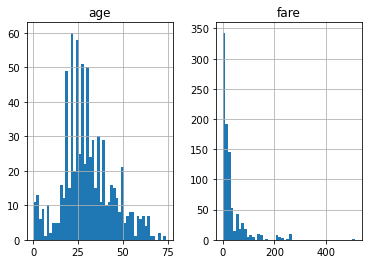

In [8]:
# khám phá phân phối của các biến
# để quyết định sử dụng giá trị bất kỳ nào

X_train.hist(bins=50)
plt.show()

In [9]:
## Yêu cầu 2: Với bản mô phòng này, chúng ta sẽ thay thế NA bằng 2 giá trị bất kỳ khác nhau
# một ở xa đầu phải của phân phối ==> 99
# và thay bằng -1, tận dụng Age chỉ nhận các giá trị dương

# trước tiên thay với 99
## VIẾT CODE Ở ĐÂY:
X_train['Age_99'] = impute_na(X_train,'age',99)

# giờ thay với -1
## VIẾT CODE Ở ĐÂY:
X_train['Age_minus1'] = impute_na(X_train,'age',-1)

X_train.head(15)

,age,fare,Age_99,Age_minus1
501,13.0,19.5000,13.0,13.0
588,4.0,23.0000,4.0,4.0
402,30.0,13.8583,30.0,30.0
1193,NaN,7.7250,99.0,-1.0
686,22.0,7.7250,22.0,22.0
971,NaN,7.8792,99.0,-1.0
117,30.0,56.9292,30.0,30.0
540,2.0,26.0000,2.0,2.0
294,49.0,110.8833,49.0,49.0
261,35.0,26.2875,35.0,35.0


Xem các hàng có dữ liệu bị khuyết (NaN) trong Age và các biến mới được thay thế bằng 99 hoặc -1 như thế nào.

In [10]:
## Yêu cầu 3: chúng ta thấy phương sai thay đổi sau khi gán giá trị bất kỳ
# điều này được dự tính vì phần trăm dữ liệu bị khuyết khá
# cao ở Age, ~20%

## VIẾT CODE Ở ĐÂY:
print('Original variable variance: ', X_train['age'].var())
print('Variance after 99 imputation: ', X_train['Age_99'].var())
print('Variance after -1 imputation: ', X_train['Age_minus1'].var())

Original variable variance:  194.16304666581854
Variance after 99 imputation:  888.7051993280891
Variance after -1 imputation:  307.9400526938762


<details><summary> Gợi ý </summary>

[var()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html)

</details>

Trên thực tế, ảnh hưởng đến phương sai cũng được thúc đẩy bởi độ lớn của giá trị tùy ý được gán, so sánh 99 với -1.

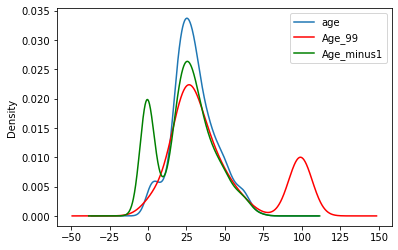

In [11]:
## Yêu cầu 4: chúng ta thấy các phân phối đã thay đổi
# với nhiều giá trị hơn tích lũy hướng tới các giá trị tùy ý

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
## VIẾT CODE Ở ĐÂY:
X_train['age'].plot(kind='kde', ax=ax)

# biến được gán với 99
## VIẾT CODE Ở ĐÂY:
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# biến được gán với -1
## VIẾT CODE Ở ĐÂY:
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<details><summary> Gợi ý </summary>

[plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

</details>

Như đã đề cập ở trên, gán giá trị tùy ý làm sai lệch phân phối ban đầu của biến Age. Biến đã biến đổi hiển thị nhiều giá trị hơn xung quanh các giá trị bất kỳ.

**Điều này quan trọng không?**

Còn tùy thuộc vào mô hình học máy mà chúng ta muốn xây dựng. Mô hình tuyến tính giả định rằng các biến được phân phối chuẩn. Việc gán các giá trị bất kỳ có thể làm sai lệch phân phối chuẩn ban đầu nếu % dữ liệu bị khuyết cao. Do đó, biến được gán cuối cùng sẽ không được phân phối chuẩn nữa, nên có thể ảnh hưởng đến chất lượng của mô hình tuyến tính.

Mặt khác, kỹ thuật này hoạt động khá tốt với các thuật toán cây.

In [12]:
## Yêu cầu 5: chúng ta cũng nói rằng gán giá trị bất kỳ có thể ảnh hưởng tới mối quan hệ
# với các biến khác trong tập dữ liệu, hãy quan sát 

cols = ['fare', 'age', 'Age_99', 'Age_minus1']
## VIẾT CODE Ở ĐÂY:
X_train[cols].cov()

,fare,age,Age_99,Age_minus1
fare,2248.326729,136.176223,-38.722001,177.733891
age,136.176223,194.163047,194.163047,194.163047
Age_99,-38.722001,194.163047,888.705199,-175.265319
Age_minus1,177.733891,194.163047,-175.265319,307.940053


<details><summary> Gợi ý </summary>

[cov()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html)

</details>

Chúng ta thấy hiệp phương sai giữa Age và Fare cũng thay đổi sau khi gán giá trị bất kỳ.

<AxesSubplot:>

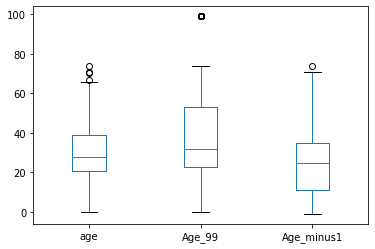

In [13]:
## Yêu cầu 6: Cuối cùng, gán giá trị bất kỳ có thể 
# ảnh hưởng tới nhận thức outlier

# Hãy tìm hiểu điều này sử dụng biểu đồ hộp
col = ['age', 'Age_99', 'Age_minus1']
## VIẾT CODE Ở ĐÂY:
X_train[col].plot(kind = 'box')

<details><summary> Gợi ý </summary>

[boxplot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

</details>

Chúng ta có thể thấy rằng việc thêm các giá trị vào cuối toàn bộ các giá trị mặt nạ phân phối là các outlier trong phân phối ban đầu.

## Tập dữ liệu giá nhà

Tập dữ liệu này có các biến có nhiều hoặc ít dữ liệu bị khuyết. Do đó, chúng ta có thể so sánh ảnh hưởng của gán giá trị bất kỳ trong cả hai trường hợp.

In [14]:
# chúng ta sẽ chỉ sử dụng các biến sau,
# 3 trong số đó chứa NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [15]:
# load tập dữ liệu giá nhà

data = pd.read_csv('./datatset/house-price/houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [16]:
# in ra các biến chứa dữ liệu bị khuyết

# trong list tiếp theo, lặp qua tất cả các cột có trong list
# của tập dữ liệu và lựa chọn các cột chứa dữ liệu bị khuyết

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
# tìm phần trăm dữ liệu bị khuyết trong các biến đó
# code tương tự như đã học ở phần đặc điểm của biến

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

Trước tiên, chia thành tập huấn luyện và kiểm tra.

In [30]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

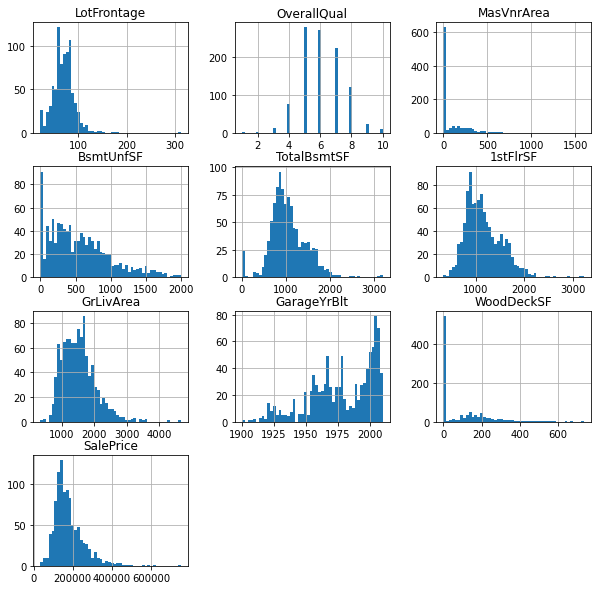

In [31]:
# vẽ biểu đồ phân bố của các biến
# chúng ta đã học code này ở phần các đặc điểm của biến

X_train.hist(bins=50, figsize=(10,10))
plt.show()

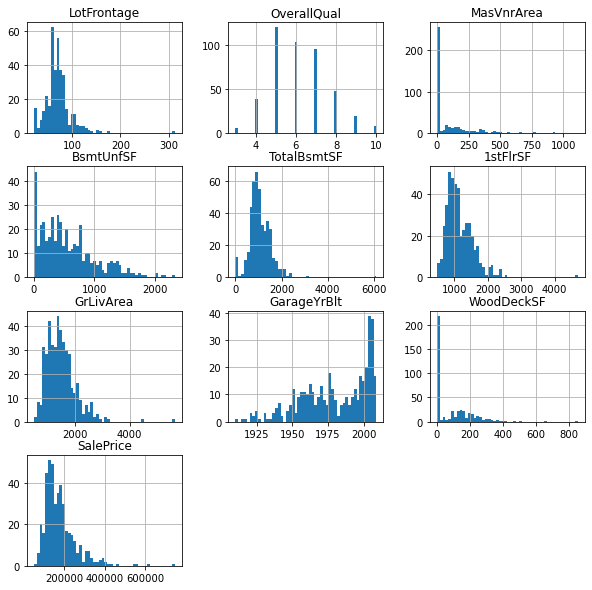

In [32]:
X_test.hist(bins=50, figsize=(10,10))
plt.show()

In [33]:
## Yêu cầu 7: Làm việc với biến LotFrontage trước

# tạo một biến mới với giá trị bị khuyết đã thay
# bằng 999 sử dụng hàm đã tạo phía trên

# trong trường hợp này, chọn 999 để thay giá trị ở xa đầu cuối bên phải của
# phân phối. Như chúng ta thấy từ biểu đồ trên, LotFrontAge nhận giá trị
# lên tới 300

## VIẾT CODE Ở ĐÂY:
X_train['LotFrontage_imputed'] = impute_na(X_train,'LotFrontage',999)
X_test['LotFrontage_imputed'] = impute_na(X_test,'LotFrontage',999)

<ipython-input-33-ef50ff698eeb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['LotFrontage_imputed'] = impute_na(X_train,'LotFrontage',999)
<ipython-input-33-ef50ff698eeb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['LotFrontage_imputed'] = impute_na(X_test,'LotFrontage',999)


In [34]:
## Yêu cầu 8: MasVnrArea nhận các giá trị lên tới 1500, 999 sẽ không
# hoạt động với biến này do nó là một giá trị thường, cần chọn
# giá trị lớn hơn: 2999

## VIẾT CODE Ở ĐÂY:
X_train['MasVnrArea_imputed'] = impute_na(X_train,'MasVnrArea',1500)
X_test['MasVnrArea_imputed'] = impute_na(X_test,'MasVnrArea',1500)

<ipython-input-34-b202f4bbe71d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['MasVnrArea_imputed'] = impute_na(X_train,'MasVnrArea',1500)
<ipython-input-34-b202f4bbe71d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['MasVnrArea_imputed'] = impute_na(X_test,'MasVnrArea',1500)


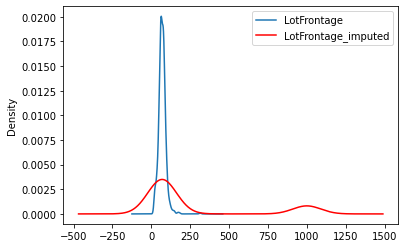

In [35]:
# đánh giá tác động của gán giá trị bất kỳ với phân phối

# có thể thấy phân phối cho LotFrontAge đã thay đổi
# với nhiều giá trị hơn tích lũy hướng tới 999

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# biến được gán với 999
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

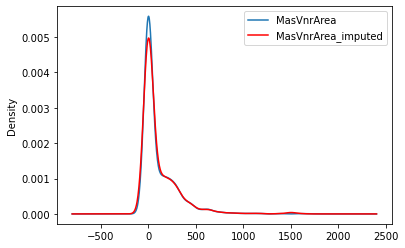

In [36]:
# Với MasVnrArea, do phần trăm dữ liệu bị khuyết 
# thấp, thay đổi trong phân phối cũng nhỏ

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# biến được gán với 2999
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Từ các biểu đồ trên, chúng ta có thể thấy phân phối của LotFrontAge thay đổi khá nhiều, nhiều hơn thay đổi phân phối của MasVnrArea. Đó là do % giá trị bị khuyết ở biến thứ hai khá nhỏ. Tuy nhiên, tùy thuộc vào giá trị bất kỳ mà chúng ta chọn để thay thế NA, phân phối sẽ bị ảnh hưởng ít nhiều.

Tại sao chúng ta không thử các con số khác và so sánh các phân phối?

Cuối cùng, từ bản mô phỏng, có thể thấy quá trình chọn giá trị bất kỳ khá thủ công. Chúng ta cần tới từng biến, quan sát phân phối và các giá trị min/max, sau đó lựa chọn giá trị bất kỳ. Nó hoạt động tốt đối với một vài biến, nhưng nếu tập dữ liệu chứa hàng trăm hoặc hàng nghìn biến thì điều đó sẽ khá bất tiện. Giải pháp thay thế để quá trình này tự động thực hiện là đặt các giá trị ở cuối phân phối, chúng ta sẽ thấy trong notebook tiếp theo. 

In [37]:
# tương tự, chúng ta có thể khám phá tác động của kỹ thuật gán tới
# phương sai

# thấy phương sai thay đổi sau khi gán cho LotFrontAgec
# điều này đã được dự kiến, do phần trăm dữ liệu bị khuyết khá
# cao, ~20%

# thực tế, tác động khá lớn

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885676
Variance after imputation:  130742.07296576179


In [38]:
# tương tự với MasnVnrArea, mặc dù % NA nhỏ
# giá trị bất kỳ lớn hơn rất nhiều, sẽ tác động lại phương sai
# một chút

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.538710039466
Variance after imputation:  42325.0598488497


In [39]:
# cuối cùng, hãy khám phá hiệp phương sai:
# dành chút thời gian so sánh các giá trị trong bảng dưới đây.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,7.164761e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,-18.279174,1.072965e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,1582.711167,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-19005.620715,7.932011e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,1620.452017,2.484283e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,7485.021442,2.025688e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,9634.034363,3.595634e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,45.643154,1.385783e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,5377.154974,2.938456e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,950743.964420,6.971763e+06
